# Federated Clustering Approach (10% Intervals)
In the following Notebook, we will be performing K-Means clustering as previous, except we will be employing a **Federated Learning** approach. That is to say, we will be treating the data collected from different studies as private and siloed instances that cannot be shared. *Federated Learning* is a deep learning approach pioneered by Google that focuses on retaining the privacy of sensitive data. We will treat the individual studies as independent silos of data.

For each study, we will **assume** that principal components 1 and 2 are sufficient for representing a majority of the variance within the data. This assumption arises as we require all data to exist within the same $n$-dimensional plane (in our case $n = 2$). We will employ the Elbow Method once more for each survey. Visual analysis of the graphs will allow us to better understand the correct value for k in each instance. We will run our K-Means algorithm for each server. 

From then, we will collect all of the cluster centroids in a common array. It is at this point that the data will no longer be siloed. Although it is important to preserve the privacy of the data, the location of the centroids is considered a property of the machine learning model we are using. In most Federated Learning cases, returning attributes or properties of the model is standard practice, so long as it does not risk the security of the sensitive data. In this particular example, it is not possible to infer the values associated with specific data points from the centroids. Therefore, the privacy of the data has not been breached.

Using the centroids, we will once again use the Elbow Point of an inertia reduction diagram to calculate a good value for k. We will perform a second iteration of the K-Means algorithm using our new value for k on the centroids. Once complete, we will use this new information to combine clusters of the original siloed data and return the results. We will compare this with our clusters from the previous notebook. 

# Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Data Loading

In [2]:
sets = []

#Fridberg
fridberg_win=pd.read_csv("../data/cleaned/Fridberg_rolling_Wins_95.csv")
fridberg_loss=pd.read_csv("../data/cleaned/Fridberg_rolling_Losses_95.csv")
sets.append([fridberg_win, fridberg_loss])

#Horstmann
horstmann_win=pd.read_csv("../data/cleaned/Horstmann_rolling_Wins_100.csv")
horstmann_loss=pd.read_csv("../data/cleaned/Horstmann_rolling_Losses_100.csv")
sets.append([horstmann_win, horstmann_loss])

#Kjome
kjome_win=pd.read_csv("../data/cleaned/Kjome_rolling_Wins_100.csv")
kjome_loss=pd.read_csv("../data/cleaned/Kjome_rolling_Losses_100.csv")
sets.append([kjome_win, kjome_loss])

#Maia
maia_win=pd.read_csv("../data/cleaned/Maia_rolling_Wins_100.csv")
maia_loss=pd.read_csv("../data/cleaned/Maia_rolling_Losses_100.csv")
sets.append([maia_win, maia_loss])

#Premkumar
premkumar_win=pd.read_csv("../data/cleaned/Premkumar_rolling_Wins_100.csv")
premkumar_loss=pd.read_csv("../data/cleaned/Premkumar_rolling_Losses_100.csv")
sets.append([premkumar_win, premkumar_loss])

#Steingrover150
steingrover100_win=pd.read_csv("../data/cleaned/Steingroever2011_rolling_Wins_150.csv")
steingrover100_loss=pd.read_csv("../data/cleaned/Steingroever2011_rolling_Losses_150.csv")
sets.append([steingrover100_win, steingrover100_loss])

#Steingrover100
steingrover150_win=pd.read_csv("../data/cleaned/SteingroverInPrep_rolling_Wins_100.csv")
steingrover150_loss=pd.read_csv("../data/cleaned/SteingroverInPrep_rolling_Losses_100.csv")
sets.append([steingrover150_win, steingrover150_loss])

#Wetzels
wetzels_win=pd.read_csv("../data/cleaned/Wetzels_rolling_Wins_150.csv")
wetzels_loss=pd.read_csv("../data/cleaned/Wetzels_rolling_Losses_150.csv")
sets.append([wetzels_win, wetzels_loss])

#Wood
wood_win=pd.read_csv("../data/cleaned/Wood_rolling_Wins_100.csv")
wood_loss=pd.read_csv("../data/cleaned/Wood_rolling_Losses_100.csv")
sets.append([wood_win, wood_loss])

#Worthy
worthy_win=pd.read_csv("../data/cleaned/Worthy_rolling_Wins_100.csv")
worthy_loss=pd.read_csv("../data/cleaned/Worthy_rolling_Losses_100.csv")
sets.append([worthy_win, worthy_loss])

## Data Manipulation

In [3]:
#We find the net score for each participant of each study as before.
net_sets = []

for s in sets:
    st=s[0].iloc[:,:-2] + s[1].iloc[:,:-2].values
    net_sets.append(st)

At this point, we have created a dataset for each study accounting for participants' net cummulative score measured at 10% intervals.

# K-Means Clustering

## Standardization
As before, we must standardize our data so that each feature has a **mean of 0** and a **standard deviation of 1**. We will not be using a scree plot to find the cumulative variance represented by the principal components as we assume 2 principal components is sufficient.

In [4]:
#Instantiate our scaler
min_max_scaler = preprocessing.MinMaxScaler()

#normalized set
norm_sets = []

#Normalize our datasets
for s in net_sets:
    s = pd.DataFrame(min_max_scaler.fit_transform(s), columns=s.columns)
    norm_sets.append(s)

## Perfoming PCA

In [5]:
pca_sets = []

#Instantiating our PCA Function
pca = PCA(n_components=10, svd_solver = 'auto')

#Finding the 10 Principal Components of our Dataset
for s in norm_sets:
    pc_norm_set=pca.fit_transform(s)

    #Creating datasets of the principal components for visualization
    pc_norm_set = pd.DataFrame(data = pc_norm_set, columns = ['PC 1', 'PC 2', 'PC 3',
                                                       'PC 4', 'PC 5', 'PC 6',
                                                      'PC 7', 'PC 8', 'PC 9', 'PC 10'])
    pca_sets.append(pc_norm_set)

In [6]:
#Attaching survey names
finished_sets = []

i = 0
while i < len(pca_sets):
    st = pd.concat([pca_sets[i], sets[i][0].iloc[:,-2:]], axis=1)
    finished_sets.append(st)
    i +=1

## The Elbow Method
We will now perform the elbow method for each of our servers.

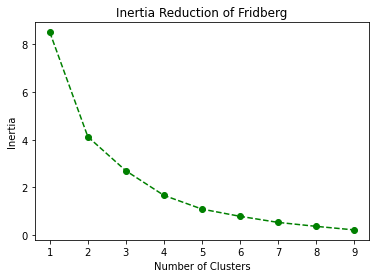

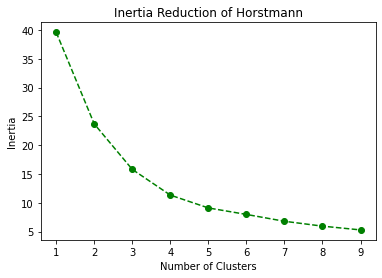

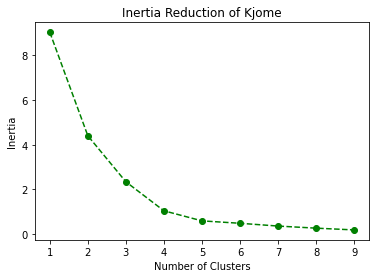

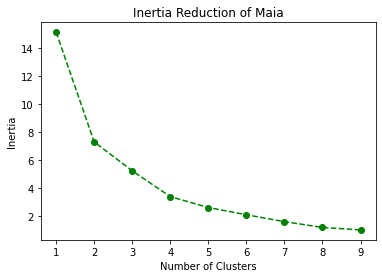

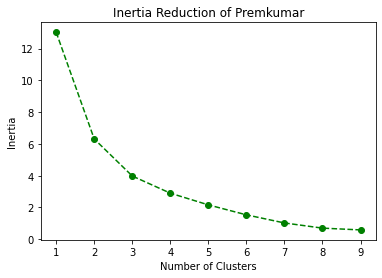

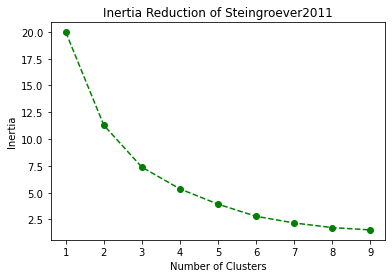

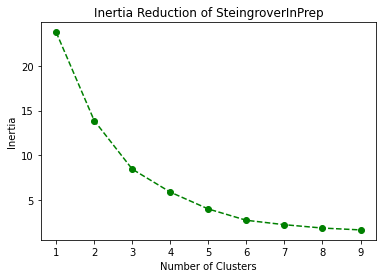

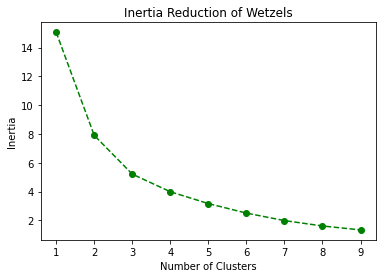

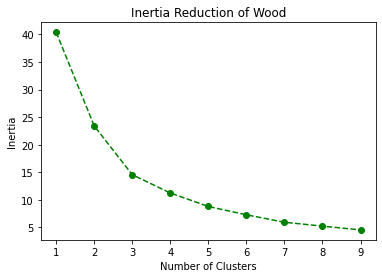

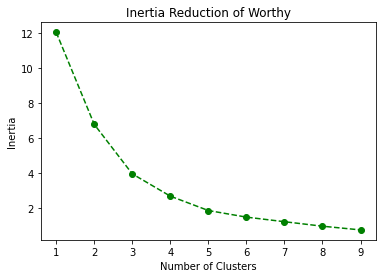

In [7]:
#Setting up subplots
for s in finished_sets:
    #Let X equal our points. We use only the first and second Principal Components
    X = s.iloc[:,:2]

    #List of inertias
    inertias = []

    #Finding and appending Inertia to list
    for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, random_state=10).fit(X)
        inertias.append(kmeans.inertia_)

    #Create Inertia Line Plot
    plt.plot(range(1,10), inertias, "go--")
    plt.title(f'Inertia Reduction of {s.Study.unique()[0]}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

It is difficult to choose a k in some cases from the plots above. We will list the studies and the number of clusters they will use as key-value pairs below:
* Fridberg 3
* Hortsmann 3
* Kjome 4
* Maia 4
* Premkumar 3
* Steingrover2011 3
* SteingroverInPrep 3
* Wetzels 3
* Wood 3
* Worthy 3

Giving us a total of **32** clusters across 10 studies. Let's perform our K-Means algorithm. 

## K-Means Clustering

In [8]:
import seaborn as sns
sns.set(style='darkgrid')

cluster_order = [3, 4, 4, 3, 3, 3, 3, 3, 3, 3]
labels, centroids=[], pd.DataFrame()
positions = [[0,0],[0,1],
             [1,0],[1,1],
             [2,0],[2,1],
             [3,0],[3,1],
             [4,0],[4,1]]
             
fig, axs = plt.subplots(5,2,figsize=(15,30))

#Paramater i accesses the cluster_order list and the positions list
i =0
for study in finished_sets:
    
    X = study.iloc[:,:2]
    
    kmeans = KMeans(n_clusters=cluster_order[i], random_state=10).fit(X)
    
    #Calculating Labels
    label = kmeans.labels_
    labels.append(label)
    
    #Adding labels to our study dataframes
    study["Cluster"]=label

    #Calculating Centroids
    centroid = pd.DataFrame(data=kmeans.cluster_centers_, columns=["Centroid PC 1", "Centroid PC 2"])
    centroid["Study"]=study.Study.unique()[0]
    centroids=pd.concat([centroids, centroid], axis=0)
    
    #Associating points with centroid
    study["Centroid X"]=centroid.loc
    
    for lbl in np.unique(label):
        
        #Plotting data
        sns.scatterplot(x='PC 1', y='PC 2', data=X.iloc[:,:2][label==lbl], ax=axs[positions[i][0],positions[i][1]])
        axs[positions[i][0],positions[i][1]].set_title(f"Clustering of {study.Study.unique()[0]}")
    
    #Plotting centroids
    sns.scatterplot(x='Centroid PC 1', y='Centroid PC 2', data=centroid, ax=axs[positions[i][0],positions[i][1]],
                    marker="+", s=200, color=".05", alpha=1)

    i+=1

#Fixing centroid index
centroids.reset_index(inplace=True, drop=True)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

## Centroid Elbow Method
We now have a collection of all centroids for all seperate studies. Let's plot these, once again perform inertia reduction and select $k$ using the elbow method, and finally cluster our centroids.

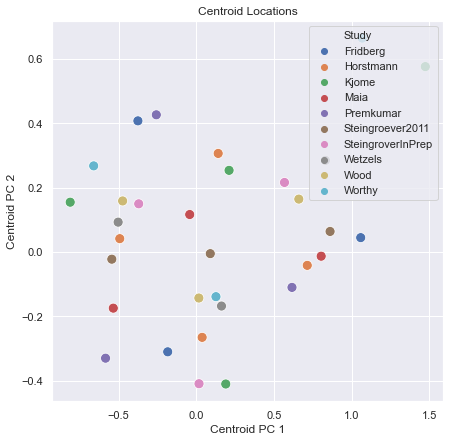

In [12]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='Centroid PC 1', y='Centroid PC 2', data=centroids, hue="Study",
                   marker="o", s=100, alpha=1)
plt.title("Centroid Locations")
plt.show()

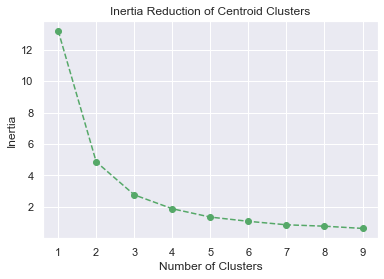

In [10]:
#Let X equal our points. We use only the first and second Principal Components
X = centroids.iloc[:,:2]

#List of inertias
inertias = []

#Finding and appending Inertia to list
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=10).fit(X)
    inertias.append(kmeans.inertia_)

#Create Inertia Line Plot
plt.plot(range(1,10), inertias, "go--")
plt.title(f'Inertia Reduction of Centroid Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

From the above plot it seems that 3 will be an acceptable value for $k$. Let's perform the clustering and better understand which centroids belong together.

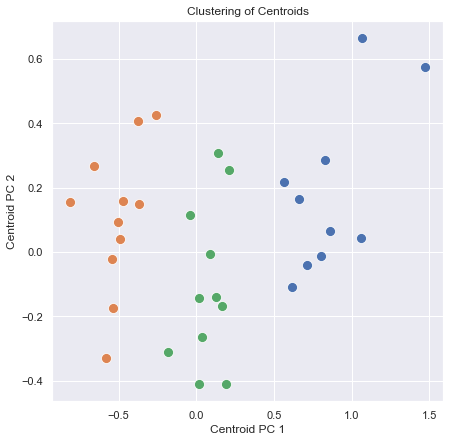

In [13]:
plt.figure(figsize=(7,7))
plt.title("Clustering of Centroids")

#Let X equal our points
X = centroids.iloc[:,:2]

#Perform kmeans and fit X
kmeans = KMeans(n_clusters=3).fit(X)

#Calculating Labels
label = kmeans.labels_

#Calculating centroids
centroid_centroids = kmeans.cluster_centers_

for lbl in np.unique(label):
        
        #Plotting data
        sns.scatterplot(x='Centroid PC 1', y='Centroid PC 2', data=X[label==lbl], marker="o", s=100, alpha=1)

#Concat the label to our centroid df
centroids["Cluster"]=label

plt.show()

## Visualization of Federated Result
At this point, we will conglomerate all of the data points into one graph. We will instantiate the kmeans algorithm with 3 centroids which we calculated for our cluster centers above. Note that although the data will be represented on one plot, they still remain siloed.

**Note: Currently Struggling with the particular visualization. It is difficult to reverse-engineer clusters of clusters to associate them with the original points. Currently looking into it. Since I'm 4 days behind I thought it would be best to upload the book in its current state and fix this issue when I am able to.**